In [14]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

Raw Signal ASD Comparison

Text(0.5, 0, 'Frequency (Hz)')

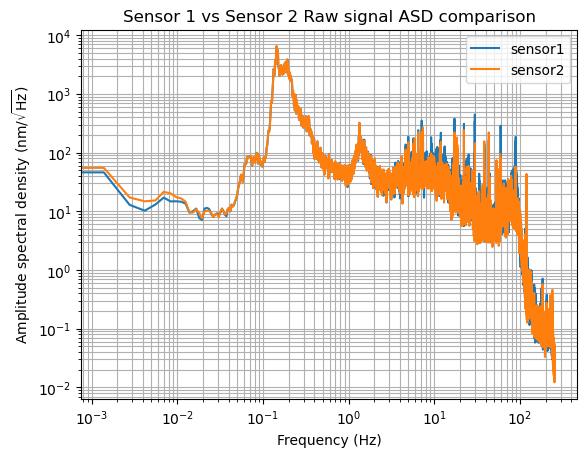

In [42]:
raw_path1 = "../data/data_1105_00_06/s1_1105_02.txt"
raw_path2 = "../data/data_1105_00_06/s2_1105_02.txt"
raw1 = np.loadtxt(raw_path1)
raw2 = np.loadtxt(raw_path2)
fs = 512
target_fs = 64
t = len(raw1[:])
nperseg = int(t/5)
f_raw1, psd_raw1 = scipy.signal.welch(raw1, fs=fs, nperseg=nperseg)
_, psd_raw2 = scipy.signal.welch(raw2, fs=fs, nperseg=nperseg)

asd_raw1 = psd_raw1**.5
asd_raw2 = psd_raw2**.5

plt.loglog(f_raw1, asd_raw1, label="sensor1")
plt.loglog(_, asd_raw2, label="sensor2")

plt.title("Sensor 1 vs Sensor 2 Raw signal ASD comparison")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Amplitude spectral density ($\mathrm{nm}/\sqrt{\mathrm{Hz}}$)")
plt.xlabel("Frequency (Hz)")

Raw Signal Coherence

Text(0.5, 0, 'Frequency (Hz)')

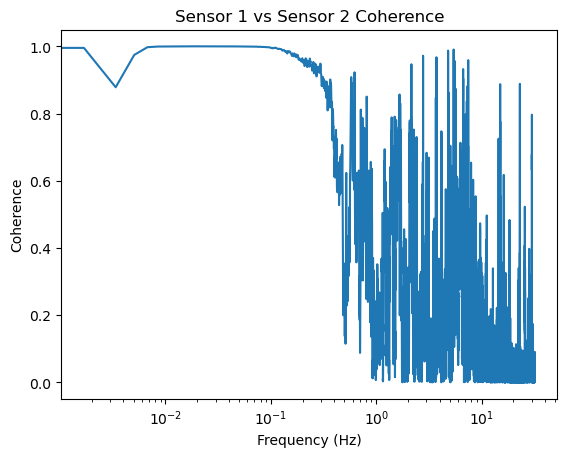

In [64]:
f_raw, coh = scipy.signal.coherence(raw1,raw2,fs=fs,nperseg=nperseg)
# f_raw1, coh_raw2 = scipy.signal.coherence(raw1,raw2,fs=fs,nperseg=nperseg)

plt.semilogx(f_raw, coh)

plt.title("Sensor 1 vs Sensor 2 Coherence")
# plt.legend(loc=0)
# plt.grid(which="both")
plt.ylabel("Coherence")
plt.xlabel("Frequency (Hz)")

Narrow down the coherence interval

Text(0.5, 0, 'Frequency (Hz)')

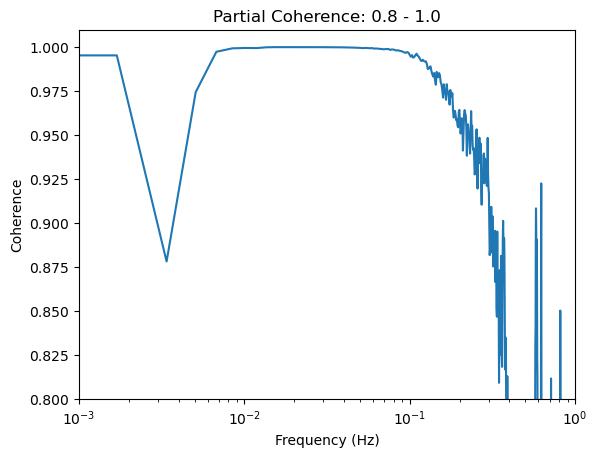

In [67]:
plt.semilogx(f_raw, coh)
plt.title("Partial Coherence: 0.8 - 1.0")
plt.ylim(0.8,1.01)
plt.xlim(1e-3,1)
plt.ylabel("Coherence")
plt.xlabel("Frequency (Hz)")

Text(0.5, 0, 'Frequency (Hz)')

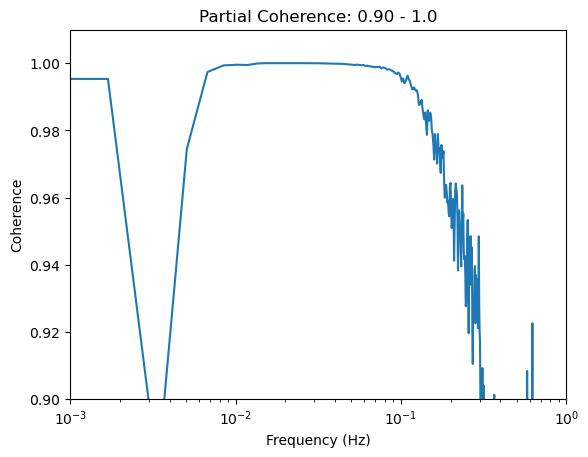

In [68]:
plt.semilogx(f_raw, coh)
plt.title("Partial Coherence: 0.90 - 1.0")
plt.ylim(0.9,1.01)
plt.xlim(1e-3,1)
plt.ylabel("Coherence")
plt.xlabel("Frequency (Hz)")

Text(0.5, 0, 'Frequency (Hz)')

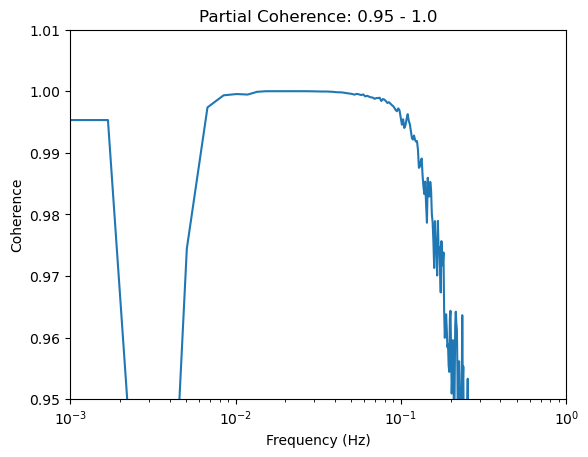

In [69]:
plt.semilogx(f_raw, coh)
plt.title("Partial Coherence: 0.95 - 1.0")
plt.ylim(0.95,1.01)
plt.xlim(1e-3,1)
plt.ylabel("Coherence")
plt.xlabel("Frequency (Hz)")

Set bandpass width according to the conherence

In [70]:
low = 0.01
high = 0.6

TestData_1105_02AM Results

In [71]:
data_path = "../data/lstm Train_1105_00_multi_scaler_filt/TestData_1105_02/combined_results_1105_02_ds.txt"
data = np.loadtxt(data_path)
t = data[:, 0]
target1 = data[:, 1]
target2 = data[:, 2]
predict1 = data[:, 3]
predict2 = data[:, 4]

mask = (t>640) * (t<3.59901*10**3) # mask out where predictions are nan

target1 = target1[mask]
target2 = target2[mask]
predict1 = predict1[mask]
predict2 = predict2[mask]
t = t[mask]

In [72]:
fs = 1/(t[1]-t[0])
nperseg = int(len(t)/5)

error1 = target1 - predict1
error2 = target2 - predict2
f, psd_predict1 = scipy.signal.welch(predict1, fs=fs, nperseg=nperseg)
_, psd_target1 = scipy.signal.welch(target1, fs=fs, nperseg=nperseg)
_, psd_error1 = scipy.signal.welch(error1, fs=fs, nperseg=nperseg)
_, psd_predict2 = scipy.signal.welch(predict2, fs=fs, nperseg=nperseg)
_, psd_target2 = scipy.signal.welch(target2, fs=fs, nperseg=nperseg)
_, psd_error2 = scipy.signal.welch(error2, fs=fs, nperseg=nperseg)

asd_predict1 = psd_predict1**.5
asd_target1 = psd_target1**.5
asd_error1 = psd_error1**.5
asd_predict2 = psd_predict2**.5
asd_target2 = psd_target2**.5
asd_error2 = psd_error2**.5

Text(0.5, 0, 'Frequency (Hz)')

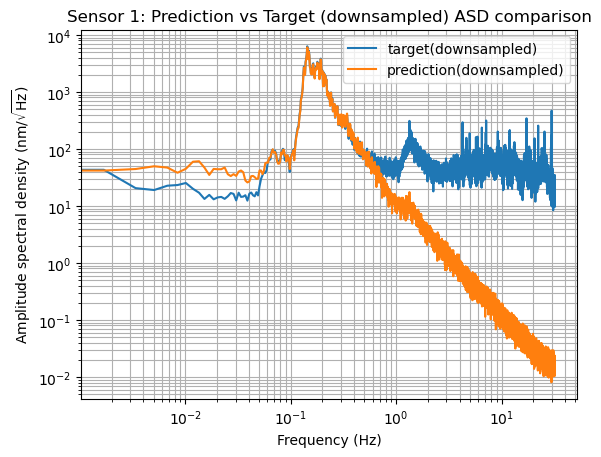

In [73]:

plt.loglog(f, asd_target1, label="target(downsampled)")
plt.loglog(f, asd_predict1, label="prediction(downsampled)")
# plt.loglog(f, asd_error1,color='green', label="error")

plt.title("Sensor 1: Prediction vs Target (downsampled) ASD comparison")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Amplitude spectral density ($\mathrm{nm}/\sqrt{\mathrm{Hz}}$)")
plt.xlabel("Frequency (Hz)")

Text(0.5, 0, 'Frequency (Hz)')

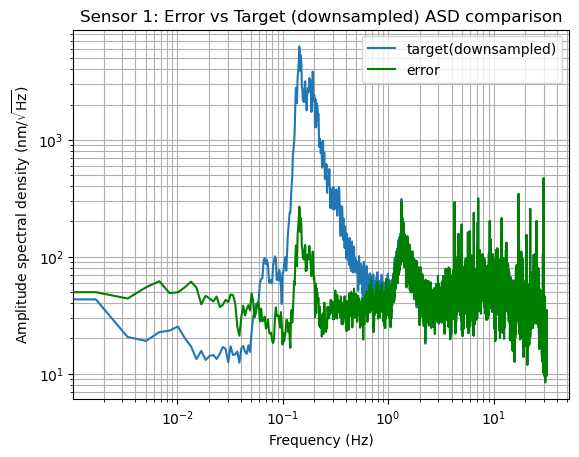

In [74]:
plt.loglog(f, asd_target1, label="target(downsampled)")
# plt.loglog(f, asd_predict1, label="prediction(downsampled)")
plt.loglog(f, asd_error1,color='green', label="error")

plt.title("Sensor 1: Error vs Target (downsampled) ASD comparison")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Amplitude spectral density ($\mathrm{nm}/\sqrt{\mathrm{Hz}}$)")
plt.xlabel("Frequency (Hz)")

Text(0.5, 0, 'Frequency (Hz)')

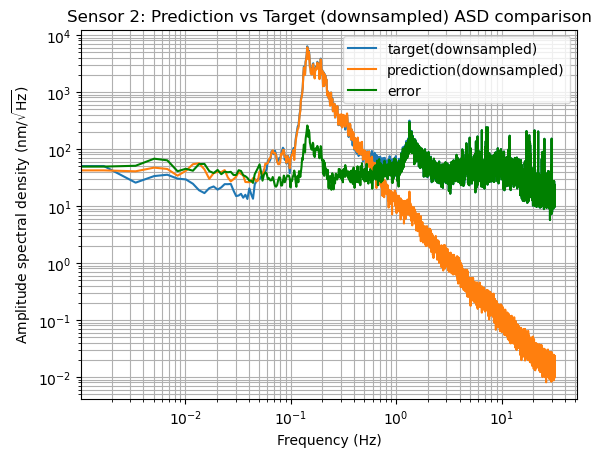

In [7]:
plt.loglog(f, asd_target2, label="target(downsampled)")
plt.loglog(f, asd_predict2, label="prediction(downsampled)")
plt.loglog(f, asd_error2,color='green', label="error")

plt.title("Sensor 2: Prediction vs Target (downsampled) ASD comparison")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Amplitude spectral density ($\mathrm{nm}/\sqrt{\mathrm{Hz}}$)")
plt.xlabel("Frequency (Hz)")

In [78]:
from IPython.display import display, Latex, Math
def performance_metrics(low,high,asd_error,asd_target):
    mask2 = (f>low) * (f<high)
    f_ = f[mask2]
    asd_error_ = asd_error[mask2]
    asd_target_ = asd_target[mask2]
    asd_ratio = asd_error_/asd_target_
    pse = np.sqrt(np.trapz(asd_ratio**2, f_))
    ms = 1/min(asd_ratio)
    rms_e = np.sqrt(np.trapz(asd_error_**2, f_))
    rms_t = np.sqrt(np.trapz(asd_target_**2, f_))
    rmsp = rms_e/rms_t

    return pse, ms, rms_e, rms_t, rmsp

def output_results(low,high,pse, ms, rms_e, rms_t, rmsp,sensor_index):
    print(f"--- Performance Metrics ---")
    print(f"--- Sensor {sensor_index} ---")
    print(f"--- {low}Hz to {high}Hz ---")
    print(f'sqrt((E(f)/T(f))^2 df):{pse*100:.4f}%')
    print(f'1/min((E(f)/T(f)):{ms:.4f}')
    print(f'RMS(E):{rms_e:.4f}')
    print(f'RMS(T):{rms_t:.4f}')
    print(f'RMS(E)/RMS(T):{rmsp*100:.4f}%')
    text1= r"$\Large\sqrt{\int_{low}^{high}\left(\frac{E(f)}{T(F)}\right)^2,df}\times100\% = $"
    text2= r"$\huge\frac{1}{min(\frac{E(f)}{T(f)})} = $"
    text3= r"$\Large RMS(E)=\sqrt{\int E(f)^2,df} = $"
    text4= r"$\Large RMS(T)=\sqrt{\int T(f)^2,df} = $"
    text5= r"$\Large\frac{RMS(E)}{RMS(T)}\times100\% = $"
    op1 = f'Percentage Spectrum Error = {text1} {pse*100:.4f}%'
    op2 = f'Maximum Suppression = {text2} {ms:.4f}'
    op3 = f'Residual RMSE = {text3} {rms_e:.4f}'
    op4 = f'Ground Motion RMSE = {text4} {rms_t:.4f}'
    op5 = f'RMS Percentage Error = {text5} {rmsp*100:.4f}%'
    display(Latex(op1))
    display(Latex(op2))
    display(Latex(op3))
    display(Latex(op4))
    display(Latex(op5))



In [79]:
low=0.1
high=0.5
pse, ms, rms_e, rms_t, rmsp = performance_metrics(low,high,asd_error1,asd_target1)
output_results(low,high,pse, ms, rms_e, rms_t, rmsp,1)

--- Performance Metrics ---
--- Sensor 1 ---
--- 0.1Hz to 0.5Hz ---
sqrt((E(f)/T(f))^2 df):14.1053%
1/min((E(f)/T(f)):43.0145
RMS(E):39.1466
RMS(T):900.0704
RMS(E)/RMS(T):4.3493%


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [80]:
low=0.1
high=0.4
pse, ms, rms_e, rms_t, rmsp = performance_metrics(low,high,asd_error1,asd_target1)
output_results(low,high,pse, ms, rms_e, rms_t, rmsp,1)

--- Performance Metrics ---
--- Sensor 1 ---
--- 0.1Hz to 0.4Hz ---
sqrt((E(f)/T(f))^2 df):6.5837%
1/min((E(f)/T(f)):43.0145
RMS(E):37.3084
RMS(T):899.4723
RMS(E)/RMS(T):4.1478%


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [81]:
low=0.01
high=0.6
pse, ms, rms_e, rms_t, rmsp = performance_metrics(low,high,asd_error1,asd_target1)
output_results(low,high,pse, ms, rms_e, rms_t, rmsp,1)

--- Performance Metrics ---
--- Sensor 1 ---
--- 0.01Hz to 0.6Hz ---
sqrt((E(f)/T(f))^2 df):60.6891%
1/min((E(f)/T(f)):43.0145
RMS(E):42.0804
RMS(T):900.4959
RMS(E)/RMS(T):4.6730%


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [82]:
low=0.01
high=0.6
pse, ms, rms_e, rms_t, rmsp = performance_metrics(low,high,asd_error2,asd_target2)
output_results(low,high,pse, ms, rms_e, rms_t, rmsp,2)

--- Performance Metrics ---
--- Sensor 2 ---
--- 0.01Hz to 0.6Hz ---
sqrt((E(f)/T(f))^2 df):48.7979%
1/min((E(f)/T(f)):45.4342
RMS(E):42.0422
RMS(T):901.1904
RMS(E)/RMS(T):4.6652%


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

/var/folders/tm/1dd9_wg11xv73txht6cc65j00000gp/T/ipykernel_2816/4262329695.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0)


Text(0.5, 0, 'Frequency (Hz)')

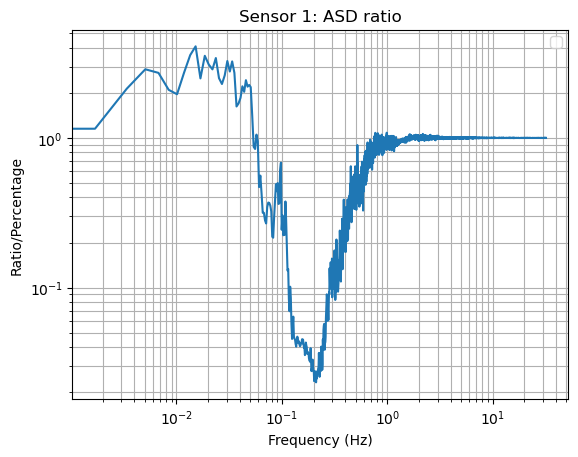

In [ ]:
asd_ratio1 = asd_error1/asd_target1
plt.loglog(f, asd_ratio1)
plt.title("Sensor 1: ASD ratio")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Ratio/Percentage")
plt.xlabel("Frequency (Hz)")